# Analysis of AMCAT Data

### Desription of data:

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

### Objectives of the EDA:

The objective of this Exploratory Data Analysis (EDA) is to deeply explore the given dataset, focusing on understanding the relationship between different variables and the target variable, Salary.

The primary goals of this analysis are as follows:

- Detailed examination of the dataset's attributes and features.
- Identification of noticeable patterns or trends within the data.
- Exploration of how the independent variables relate to the target variable (Salary).
- Detection of any outliers or irregularities present in the dataset.
- Providing actionable insights and recommendations based on the analysis.

Through this analysis, we aim to gain a comprehensive understanding of the dataset's characteristics, uncover significant relationships, and offer valuable insights to support decision-making processes.

## 1. Importing libraries and dataset

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.sample(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
402,train,464125,215000.0,6/1/12 0:00,4/1/15 0:00,data analyst,Hyderabad,m,12/6/89 0:00,70.83,...,-1,-1,-1,-1,-1,0.3555,0.8128,-1.0697,-0.05520,0.5419
3503,train,357365,265000.0,12/1/12 0:00,6/1/14 0:00,java software engineer,Mohali,m,4/10/91 0:00,89.40,...,-1,-1,-1,-1,-1,-0.2628,0.3838,-1.2511,-0.87780,0.9763
999,train,514731,445000.0,2/1/13 0:00,present,software engineer,Bangalore,m,9/18/90 0:00,63.00,...,-1,-1,-1,-1,-1,-0.2628,0.0328,-1.4688,1.94240,-1.3934
48,train,338428,390000.0,9/1/13 0:00,present,software engineer,Bangalore,m,2/28/91 0:00,86.60,...,346,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024
364,train,964017,140000.0,5/1/14 0:00,10/1/14 0:00,ui developer,-1,m,2/14/93 0:00,78.00,...,438,-1,-1,-1,-1,-1.3080,-1.1196,0.4711,0.01920,0.6721


In [14]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
personality_test         0
dtype: int64

## 2. Dropping and transforming columns

From the data description, we know that the following columns contain the scores for one section in the personality test.
columns = conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience
Thus, for reducing the dimentionality of the dataframe, we combine these scores into one column named personality_test, and drop the other.

In [6]:
data['personality_test'] = data.conscientiousness + data.agreeableness + data.extraversion + data.nueroticism +data.openess_to_experience

In [7]:
data.drop(['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID', '12graduation', 
           'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'], 
          axis=1, inplace=True)

We are intoducing two new columns here, experience and age.
For experience, we're replacing the 'present' values in DOL column with the current date.

In [9]:
data["DOB"] = pd.to_datetime(data["DOB"])
data["DOJ"] = pd.to_datetime(data["DOJ"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8644\2744180400.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["DOB"] = pd.to_datetime(data["DOB"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8644\2744180400.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["DOJ"] = pd.to_datetime(data["DOJ"])


In [10]:
from datetime import datetime

In [11]:
current_datetime = datetime.now().strftime('%d-%m-%Y %H:%M')
data['DOL'] = data['DOL'].str.replace('present', current_datetime)

data["DOL"] = pd.to_datetime(data["DOL"], format='mixed')

In [16]:
current_date = datetime.now()
data['age'] = ((current_date - data['DOB']).dt.days / 365.25).round()

In [17]:
data['experience'] = ((data['DOL'] - data['DOJ']).dt.days / 365.25).round()

In [18]:
data.drop(['DOJ', 'DOL', 'DOB'], inplace=True, axis=1)

In [19]:
data.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,personality_test,age,experience
0,420000.0,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,445,-1,-1,-1,-1,-1,-1,3.22280,34.0,12.0
1,500000.0,assistant manager,Indore,m,85.4,cbse,85.0,cbse,2,B.Tech/B.E.,...,-1,466,-1,-1,-1,-1,-1,1.64110,34.0,10.0
2,325000.0,systems engineer,Chennai,f,85.0,cbse,68.2,cbse,2,B.Tech/B.E.,...,395,-1,-1,-1,-1,-1,-1,1.95030,32.0,10.0
3,1100000.0,senior software engineer,Gurgaon,m,85.6,cbse,83.6,cbse,1,B.Tech/B.E.,...,615,-1,-1,-1,-1,-1,-1,-1.28000,34.0,13.0
4,200000.0,get,Manesar,m,78.0,cbse,76.8,cbse,2,B.Tech/B.E.,...,-1,233,-1,-1,-1,-1,-1,-2.26787,33.0,1.0


In [22]:
data.nunique()

Salary                    177
Designation               419
JobCity                   339
Gender                      2
10percentage              851
10board                   275
12percentage              801
12board                   340
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
personality_test         3973
age                        17
experience                 18
dtype: int64

The columns mentioned above should not have 0 or -1 as valid inputs, considering them as null values. Therefore, we will treat them as missing values and perform imputation.

Additionally, some columns describe optional exam subjects, leading to a substantial number of -1 values (representing nulls). To streamline our analysis, we will drop columns where the percentage of -1 values is 50% or more. For the remaining columns, we will impute the -1 values with zeros.

In [23]:
count_minus_1 = data.eq(-1).sum()

In [24]:
count_minus_1

Salary                      0
Designation                 0
JobCity                     0
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
personality_test            0
age                         0
experience                 16
dtype: int64

In [25]:
minus_1_percentage = (count_minus_1/3998)*100

In [26]:
minus_1_percentage

Salary                    0.000000
Designation               0.000000
JobCity                   0.000000
Gender                    0.000000
10percentage              0.000000
10board                   0.000000
12percentage              0.000000
12board                   0.000000
CollegeTier               0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeCityTier           0.000000
CollegeState              0.000000
GraduationYear            0.000000
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
personality_test          0.000000
age                       0.000000
experience          

In [27]:
print((data['10percentage'] <=10).sum())
print((data['12percentage'] <=10).sum())
print((data['collegeGPA'] <=10).sum())

0
0
12


In [28]:
data.loc[data['collegeGPA']<=10,'collegeGPA'].index
data.loc[data['collegeGPA']<=10,'collegeGPA'] = (data.loc[data['collegeGPA']<=10,'collegeGPA']/10)*100

In [29]:
data = data.drop(columns = ['ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
data.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,...,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,personality_test,age,experience
0,420000.0,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,Andhra Pradesh,2011,515,585,525,0.635979,445,3.22280,34.0,12.0
1,500000.0,assistant manager,Indore,m,85.4,cbse,85.0,cbse,2,B.Tech/B.E.,...,Madhya Pradesh,2012,695,610,780,0.960603,-1,1.64110,34.0,10.0
2,325000.0,systems engineer,Chennai,f,85.0,cbse,68.2,cbse,2,B.Tech/B.E.,...,Uttar Pradesh,2014,615,545,370,0.450877,395,1.95030,32.0,10.0
3,1100000.0,senior software engineer,Gurgaon,m,85.6,cbse,83.6,cbse,1,B.Tech/B.E.,...,Delhi,2011,635,585,625,0.974396,615,-1.28000,34.0,13.0
4,200000.0,get,Manesar,m,78.0,cbse,76.8,cbse,2,B.Tech/B.E.,...,Uttar Pradesh,2012,545,625,465,0.124502,-1,-2.26787,33.0,1.0


In [32]:
data['10board'] = data['10board'].replace({'0': np.nan})
data['12board'] = data['12board'].replace({'0': np.nan})
data['GraduationYear'] = data['GraduationYear'].replace({0: np.nan})
data['JobCity'] = data['JobCity'].replace({'-1': np.nan})
data['Domain'] = data['Domain'].replace({-1: np.nan})
data['ComputerProgramming'] = data['ComputerProgramming'].replace({-1: np.nan})

In [33]:
data['10board'].fillna(data['10board'].mode()[0], inplace=True)
data['12board'].fillna(data['12board'].mode()[0], inplace=True)
data['GraduationYear'].fillna(data['GraduationYear'].mode()[0], inplace=True)
data['JobCity'].fillna(data['JobCity'].mode()[0], inplace=True)

In [34]:
data['Domain'].fillna(data['Domain'].median(), inplace = True)
data['ComputerProgramming'].fillna(data['ComputerProgramming'].median(), inplace = True)

In [35]:
data.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,...,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,personality_test,age,experience
0,420000.0,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,3.22280,34.0,12.0
1,500000.0,assistant manager,Indore,m,85.4,cbse,85.0,cbse,2,B.Tech/B.E.,...,Madhya Pradesh,2012.0,695,610,780,0.960603,455.0,1.64110,34.0,10.0
2,325000.0,systems engineer,Chennai,f,85.0,cbse,68.2,cbse,2,B.Tech/B.E.,...,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,1.95030,32.0,10.0
3,1100000.0,senior software engineer,Gurgaon,m,85.6,cbse,83.6,cbse,1,B.Tech/B.E.,...,Delhi,2011.0,635,585,625,0.974396,615.0,-1.28000,34.0,13.0
4,200000.0,get,Manesar,m,78.0,cbse,76.8,cbse,2,B.Tech/B.E.,...,Uttar Pradesh,2012.0,545,625,465,0.124502,455.0,-2.26787,33.0,1.0


In [36]:
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

Making the string input in the textual columns in a consistent format by removing whitespaces, converting to lower case and such.

In [87]:
def string_data(col):
    data[col] = data[col].str.lower().str.strip()

for col in textual_columns:
    string_data(col)

In [68]:
def top_categories(data, col):
    for top_count in data[col].unique():
        min_count = data[col].value_counts()[:10].min()
        if data[data[col] == top_count][col].value_counts()[0] < min_count:
            data.loc[data[col] == top_count, col] = 'other'

In [69]:
for cols in textual_columns:
    top_categories(data, cols)

## 3. Univariate Analysis

### For Numerical Columns

In [64]:
def column_summary(data, columns):
    for column_name in columns:
        print(f"Summary statistics for column '{column_name}':")
        print("Count:", data[column_name].count())
        print("Mean:", data[column_name].mean())
        print("Median:", data[column_name].median())
        print("Minimum:", data[column_name].min())
        print("Maximum:", data[column_name].max())
        print("Standard Deviation:", data[column_name].std())
        print("=========================================\n")

In [82]:
def create_histogram(data, columns):
    num_plots = len(columns)
    num_cols = 2
    num_rows = -(-num_plots // num_cols)  

    colors = ['#5F9EA0', '#FFA07A', '#AFEEEE', '#F08080', '#98FB98', '#D8BFD8', '#FF6347', '#00CED1']

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 6))
    axes = axes.flatten()  

    for i, column in enumerate(columns):
        sns.histplot(data[column], kde=True, color=colors[i % len(colors)], ax=axes[i])
        
        mean_val = data[column].mean()
        median_val = data[column].median()
        mode_val = data[column].mode().iloc[0]
        
        axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label='Median')
        axes[i].axvline(mode_val, color='purple', linestyle='dashed', linewidth=1.5, label='Mode')
        
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].legend()
    
    for j in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [80]:
def create_boxplot(data, columns):
    num_plots = len(columns)
    num_cols = 2
    num_rows = -(-num_plots // num_cols) 

    colors = ['#5F9EA0', '#FFA07A', '#AFEEEE', '#F08080', '#98FB98', '#D8BFD8', '#FF6347', '#00CED1']

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
    axes = axes.flatten()  
    
    for i, column in enumerate(columns):
        sns.boxplot(x=column, data=data, ax=axes[i], width=0.5, color=colors[i % len(colors)])
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_ylabel(column)
    
    for j in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [62]:
columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'ComputerProgramming', 'personality_test', 'age', 'experience']

### Statistical Summary

In [65]:
column_summary(data, columns)

Summary statistics for column 'Salary':
Count: 3998
Mean: 307699.8499249625
Median: 300000.0
Minimum: 35000.0
Maximum: 4000000.0
Standard Deviation: 212737.49995685622

Summary statistics for column '10percentage':
Count: 3998
Mean: 77.9254427213607
Median: 79.15
Minimum: 43.0
Maximum: 97.76
Standard Deviation: 9.850162410652574

Summary statistics for column '12percentage':
Count: 3998
Mean: 74.46636568284141
Median: 74.4
Minimum: 40.0
Maximum: 98.7
Standard Deviation: 10.999933102957721

Summary statistics for column 'collegeGPA':
Count: 3998
Mean: 71.69572786393196
Median: 71.8
Minimum: 49.07
Maximum: 99.93
Standard Deviation: 7.406630923990486

Summary statistics for column 'English':
Count: 3998
Mean: 501.64907453726863
Median: 500.0
Minimum: 180
Maximum: 875
Standard Deviation: 104.94002081603853

Summary statistics for column 'Logical':
Count: 3998
Mean: 501.59879939969983
Median: 505.0
Minimum: 195
Maximum: 795
Standard Deviation: 86.78329691840072

Summary statistics for colum

### Histograms

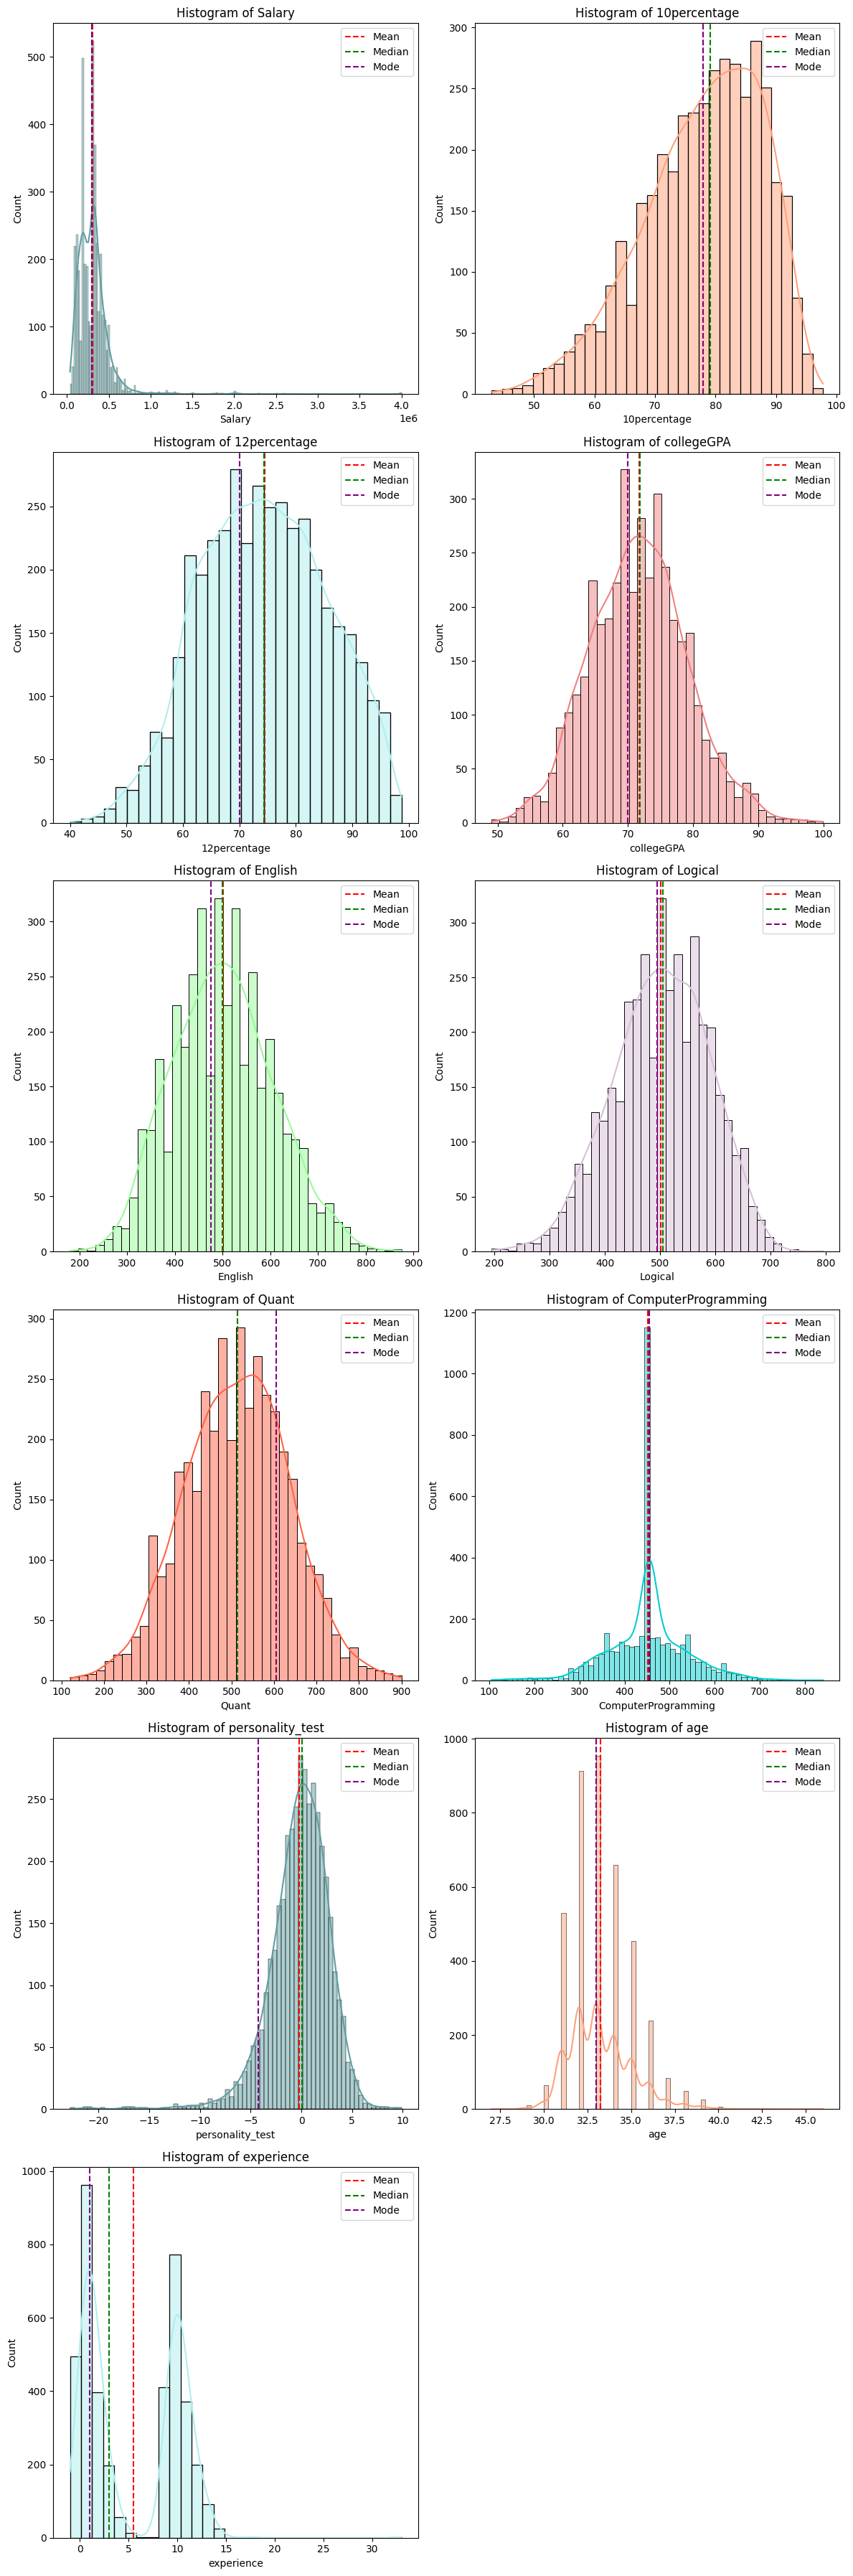

In [83]:
create_histogram(data, columns)

### Boxplots

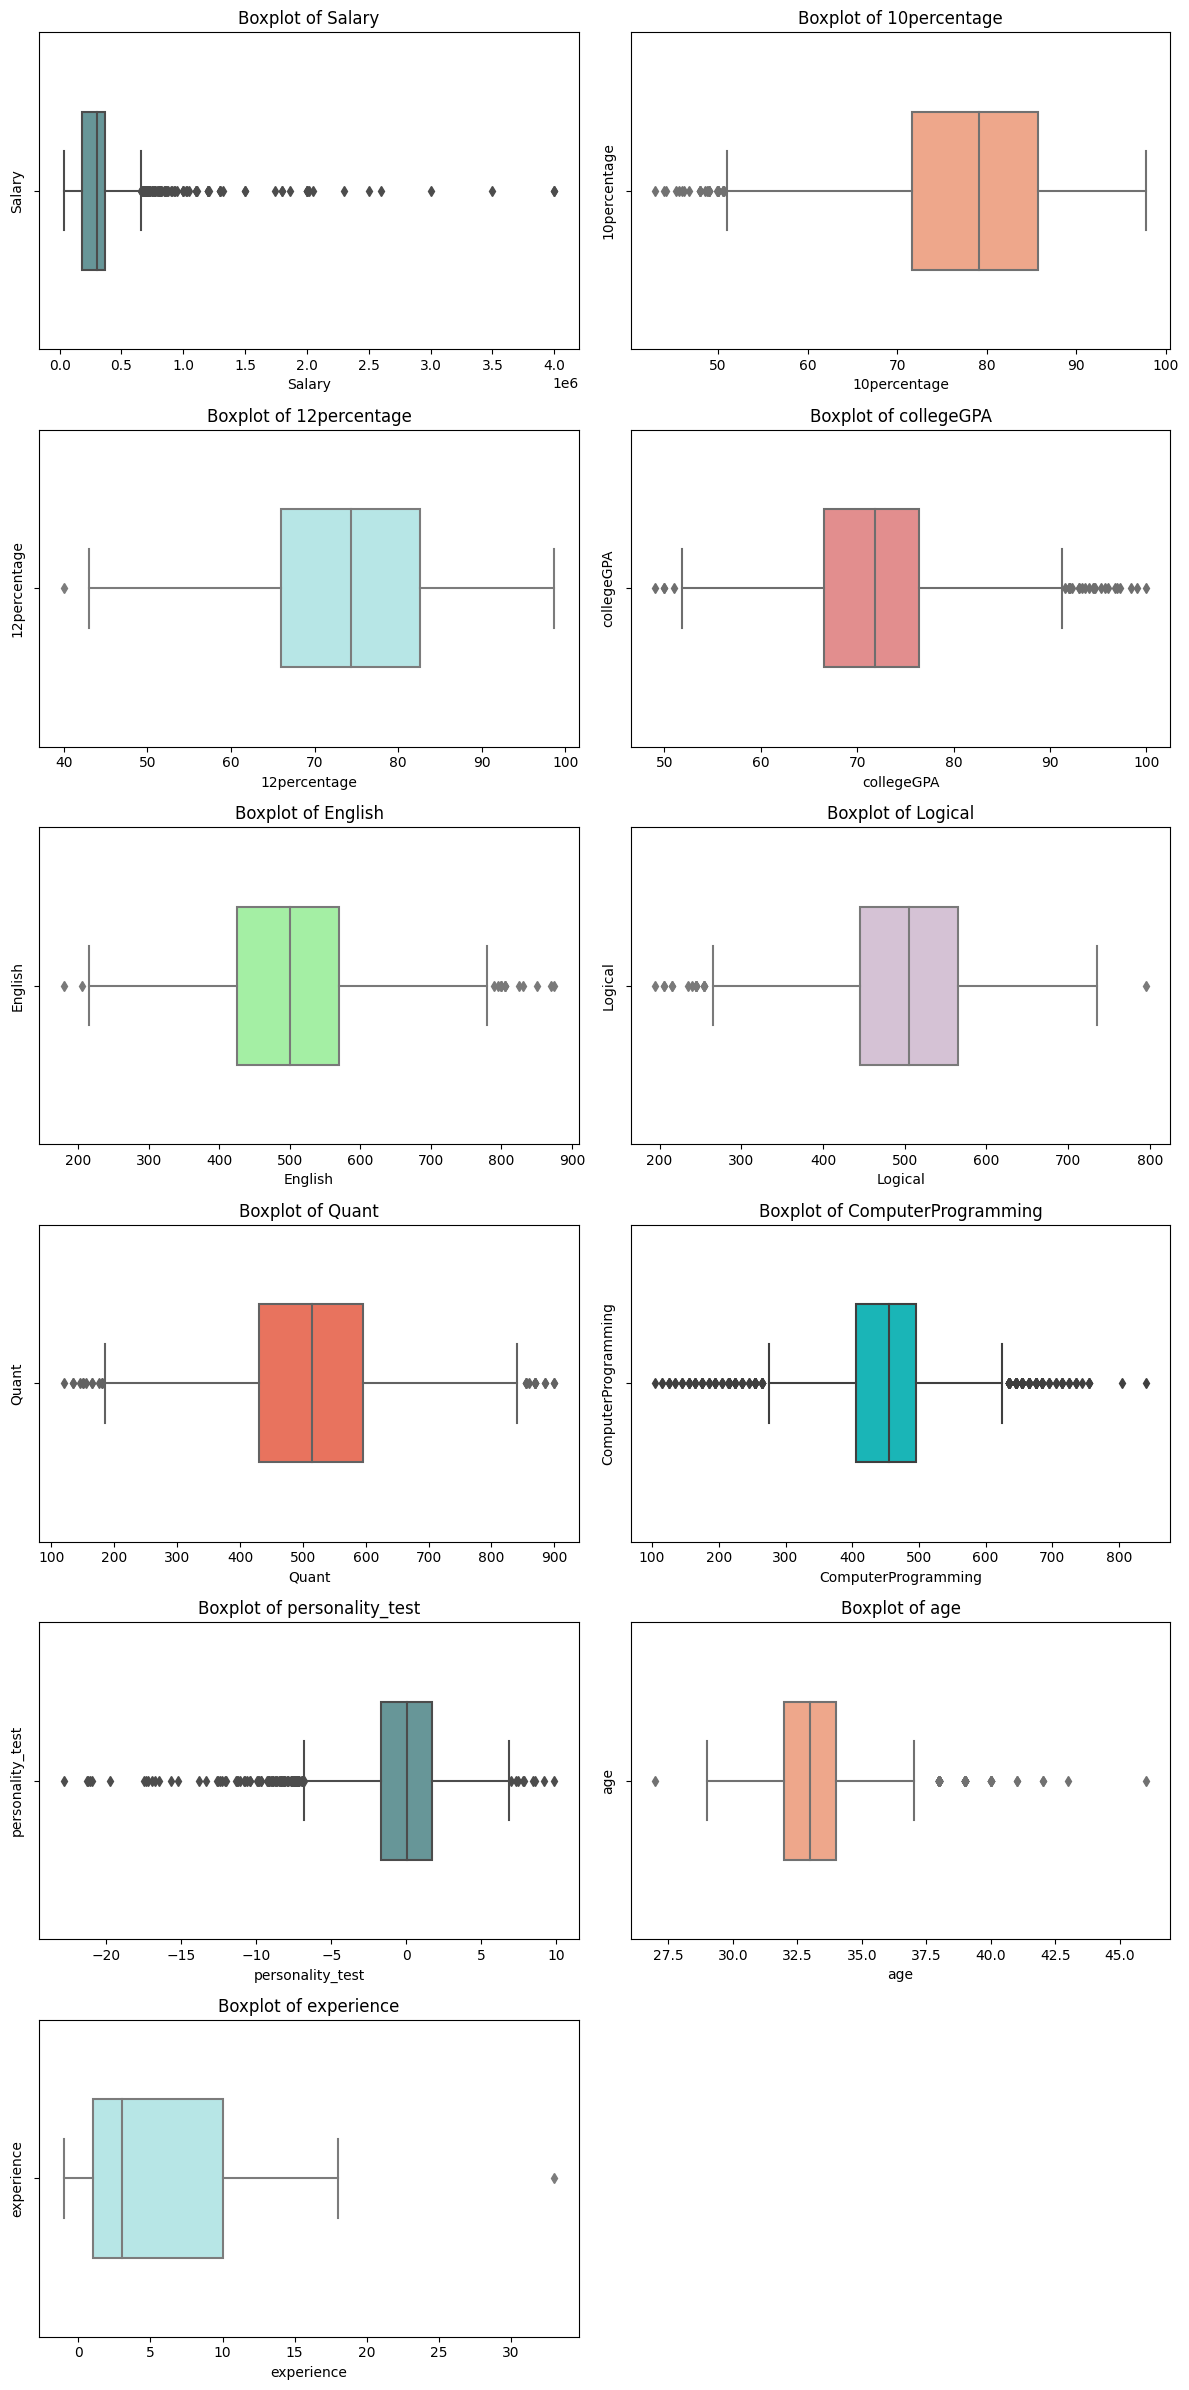

In [81]:
create_boxplot(data, columns)

### Inferences 

#### Salary

- The salary data shows significant variability, with a notable standard deviation.
The data exhibits positive skewness, indicating a departure from a normal distribution. The mean and median values are approximately equal.
- There is a concentration of high salary points, as depicted by the box plot.

#### 10th Percentage

- Around 50% of students achieved scores of roughly 79% or lower.
The histogram shows a scarcity of students with low percentages, with a peak frequency at 77%, and an average score of 76%.
- There are a few outliers on the lower end, as seen in the box plot.

#### 12th Percentage

- About half of the students scored 77% or lower.
The histogram reveals a concentration of scores between 68% and 83%, peaking at 69%, with an average of 73%.
- The box plot indicates a single data point with an extremely low score.

#### College GPA

- 75% of students had a GPA of 79% or lower.
The majority of GPAs fell between 62% and 77%, with the most common score being 70%, and an average GPA of 73%.
- Extreme values, both low and high, are visible in the box plot.

#### English

- Half of the students scored below 499 in English.
Most scores ranged from 388 to 544, peaking at 474, with an average score of 501.
- There are both lower and higher extreme values in the distribution.

#### Logical

- Half of the students scored below 499 in logical reasoning.
Scores clustered between 453 and 583, peaking at 494, with an average of 501.
- Presence of some lower extreme values, with a single high extreme value.

#### Quant

- 75% of students scored below 590 in the quantitative section.
Scores spread between 424 and 607, with the majority around 512, and an average of 512.
- The box plot highlights both low and high extreme values.

#### Computer Programming

- Half of the students scored below 499 in programming.
Scores were concentrated between 415 and 458, peaking at 454, with an average score of 451.
- Numerous low and high extreme values are evident.

#### Personality Test

- Most students scored in the negative range, with the highest value not exceeding 2.
- The data shows a slightly negative skew, with significant outliers in the negative direction.

#### Age

- About 75% of students are under 25 years old.
Ages mainly ranged from 21 to 24, with an average, median, and mode around 24.
- The box plot indicates a few students with very high ages and one with a very low age compared to others.

#### Experience

- The range for experience is 3 years.
The data is positively skewed, with more respondents having lower tenure. 50% of data points are below 1.5 years, with an average of 1.5 years.
- Some outliers have notably higher tenure values.

### For Categorical Columns

### Barplots

In [100]:
def create_barplot(data, cat_columns):
    num_plots = len(cat_columns)
    num_cols = 2
    num_rows = -(-num_plots // num_cols)

    colors = ['#5F9EA0', '#FFA07A', '#AFEEEE', '#F08080', '#98FB98', '#D8BFD8', '#FF6347', '#00CED1']

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 6))
    axes = axes.flatten()

    for i, column in enumerate(cat_columns):
        value_counts = data[column].value_counts().nlargest(10)  # Get top 10 values
        sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette=colors, orient='horizontal')
        axes[i].set_title(f'Barplot of {column}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(column)
        
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=45)

    for j in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [101]:
cat_columns = ['JobCity', '10board', '12board', 'Specialization', 'CollegeState', 'GraduationYear']

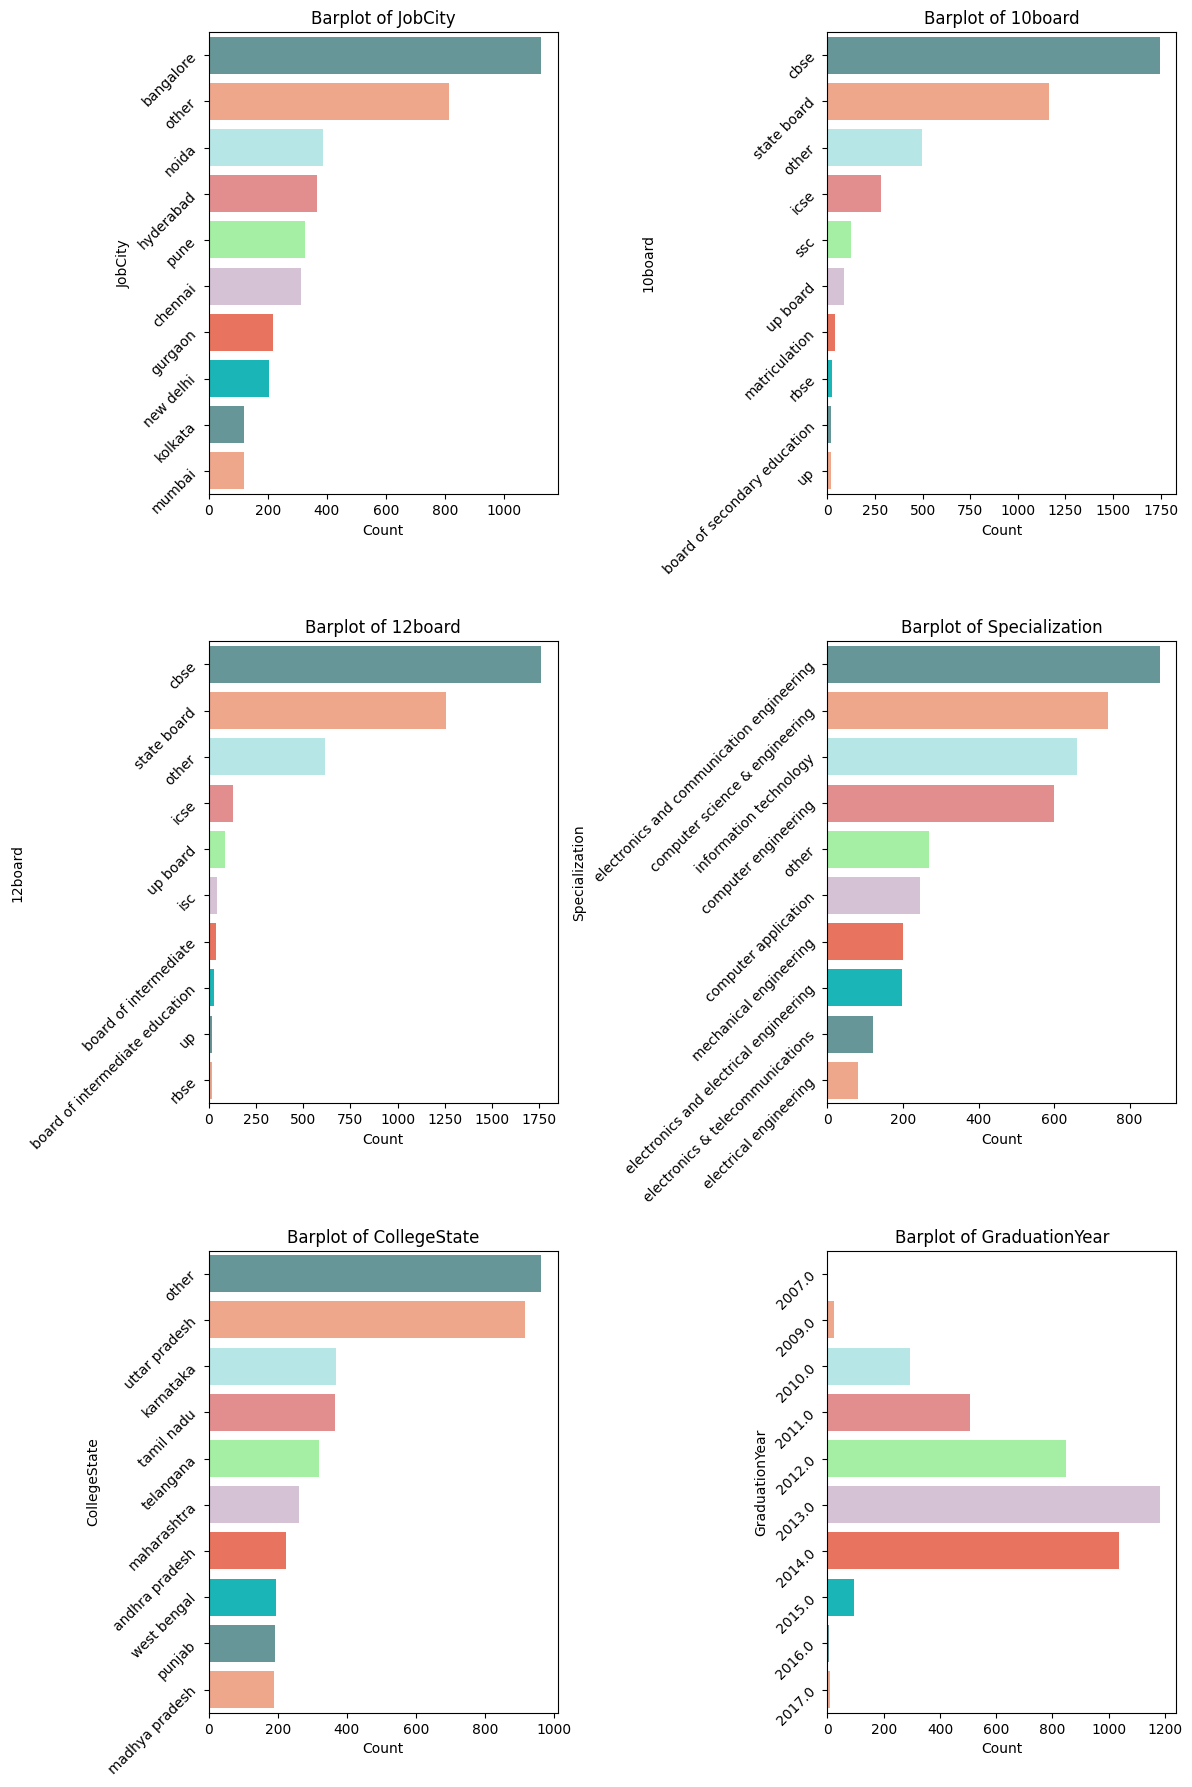

In [102]:
create_barplot(data, cat_columns)

### Inferences

#### Job City
- Most common job city is Banglore, followed by Noide by a very wide margin. Ther 'Other' section is a group of quantitatively smaller cities.

#### 10th Board
- Highest number of students have studied from CBSE, followed by the State Board.

#### 12th Board
- It follows the same pattern as 10th Board.

#### Specialization
- Most people are from the branch ECE, closely followed by CS and IT.

#### College State
- The most favourable state for colleges is Uttar Pradesh.

#### Graduation Year 
- 2013 is the year that most of the people graduated.

### Pie plots

In [129]:
def create_pieplot(data, columns):
    num_plots = len(columns)
    num_cols = 2
    num_rows = -(-num_plots // num_cols)  

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 4.5))
    axes = axes.flatten()  

    for i, column in enumerate(columns):
        ax = axes[i]
        values = data[column].value_counts()
        labels = values.index
        wedges, texts, autotexts = ax.pie(values, labels=None, autopct='', startangle=90)  

        percentages = pd.Series(values / values.sum() * 100, index=values.index)
        labels_with_perc = [f'{label} - {percentage:.1f}%' for label, percentage in zip(labels, percentages)]
        
        ax.legend(wedges, labels_with_perc, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        ax.set_title(f'Pie Chart of {column}')

    for j in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [130]:
pie_columns = ['CollegeTier', 'Degree', 'CollegeCityTier', 'Gender']

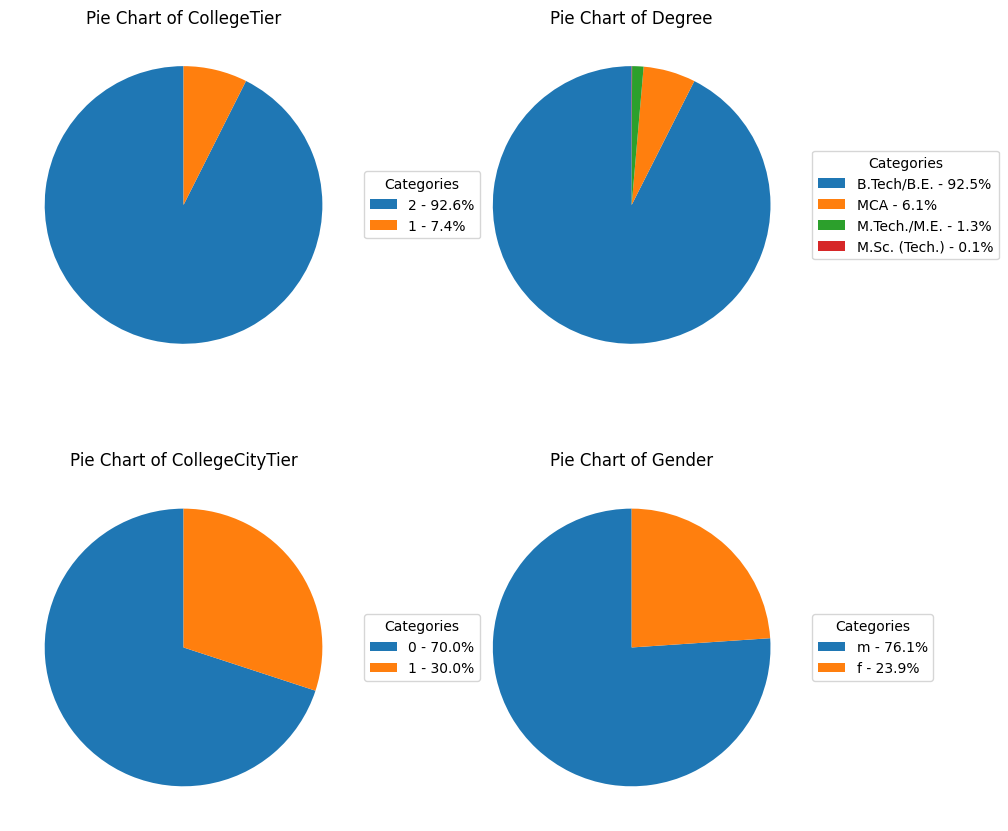

In [131]:
create_pieplot(data, pie_columns)

### Inferences

#### College Tier
- There is a huge disparity, with almost 93% students being from Tier 2 colleges.

#### Degree
- The most common degree is B. Tech., with a huge percentage of 92.5%. It is followed by MCA by a wide margin.

#### College City Tier
- Most people are from Tier 0 college states.

#### Gender
- Disparity in gender can be seen, with around 76% of population being male.

In general, the data is highly imbalanced with regards to every feature.

## 3. Bivariate Analysis

### Barplots

In [147]:
def plot_avg_salary_barplot(data, columns):
    num_plots = len(columns)

    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, num_plots * 5))

    for i, column in enumerate(columns):
        avg_salary = data.groupby(column)['Salary'].mean().sort_values()
        barplot = sns.barplot(x=avg_salary.values, y=avg_salary.index, ax=axes[i], palette='viridis', orient='horizontal')
        axes[i].set_title(f'Average Salary by {column}')
        axes[i].set_xlabel('Average Salary')
        axes[i].set_ylabel(column)

        for p, salary in zip(barplot.patches, avg_salary.values):
            axes[i].text(p.get_width(), p.get_y() + p.get_height() / 2, f'{salary:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()

In [148]:
avg_sal_cols = ['Gender', 'Specialization', 'CollegeTier', 'GraduationYear']

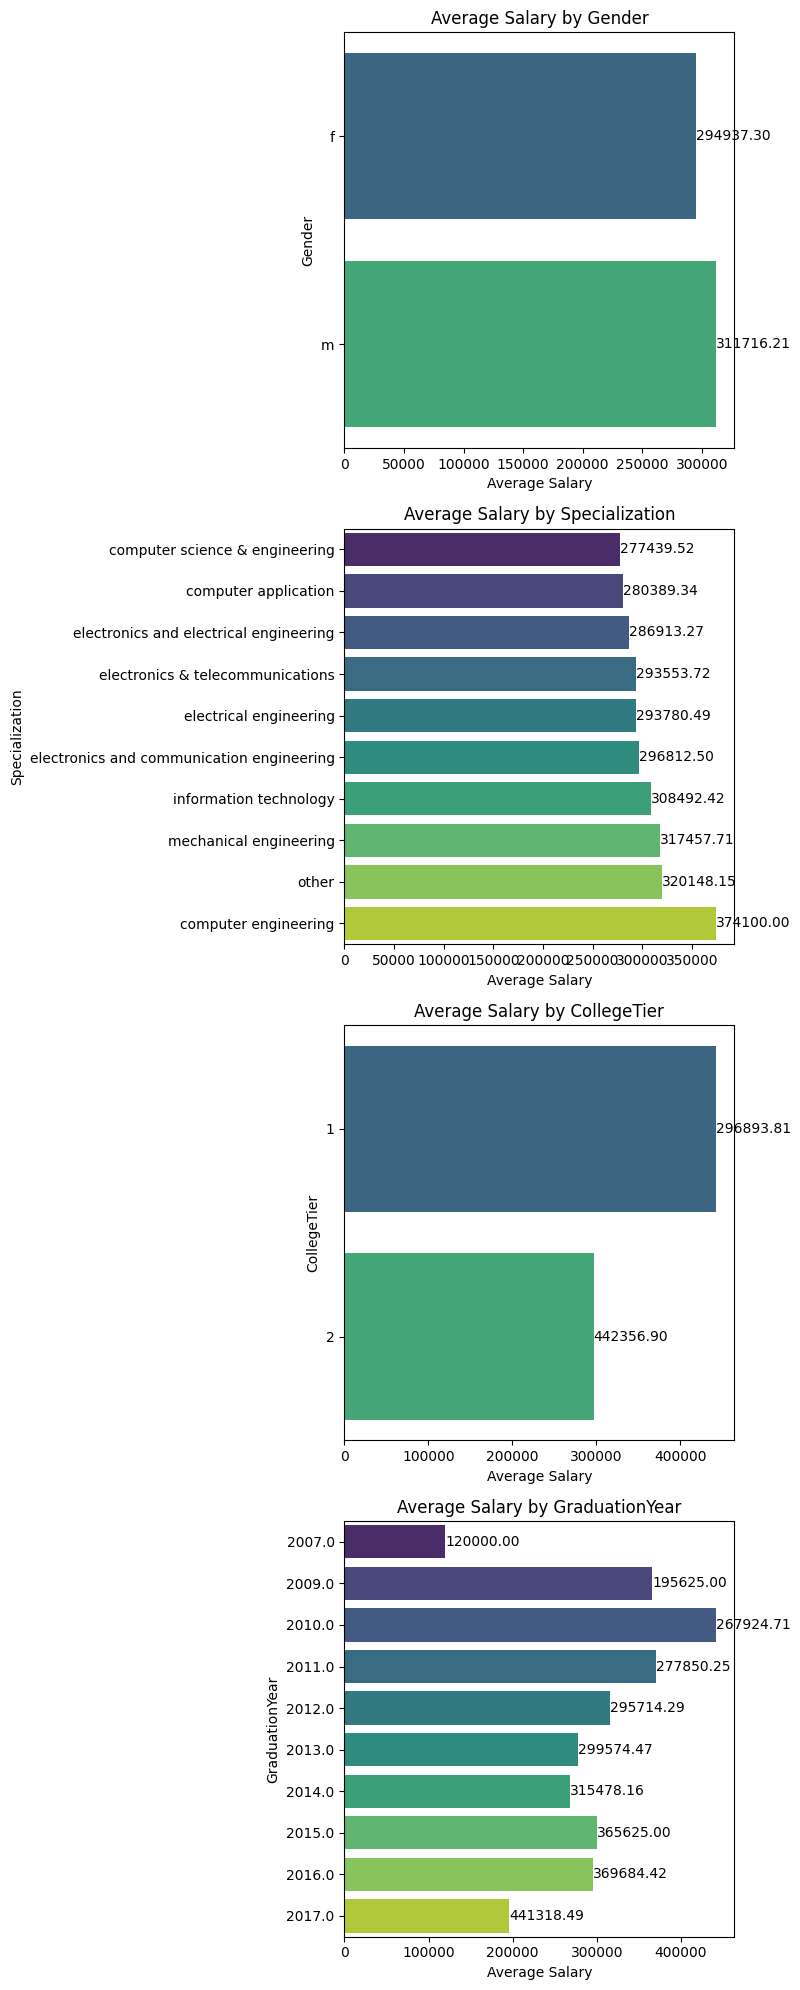

In [149]:
plot_avg_salary_barplot(data, avg_sal_cols)

### Inferences

#### Gender
- Male employees have a higher average salary distribution than female employees.

#### Specialization
- The highest average salary is of a Computer Science graduate, followed closely by Mechanical and IT graduate.

#### College Tier
- There is a large disparity in the average salaries between Tier 1 and Tier 2 colleges, with Tier 1 being on top.

#### Graduation Year
- 2010 graduates earn the highest salary.

### Scatterplots without removing outliers

In [164]:
def scatterplot_salary(data, columns):
    num_plots = len(columns)
    num_cols = 2
    num_rows = -(-num_plots // num_cols) 

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 5))

    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols

        sns.scatterplot(x='Salary', y=column, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'Scatter Plot: Salary vs {column}')
        axes[row, col].set_xlabel('Salary')
        axes[row, col].set_ylabel(column)

        corr_coef = data['Salary'].corr(data[column])

        axes[row, col].annotate(f'Corr: {corr_coef:.2f}', xy=(0.5, 0.95),
                                xycoords='axes fraction', ha='center', fontsize=10, color='blue')

    for j in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

In [165]:
scatter_columns = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'ComputerProgramming', 'personality_test', 'age', 'experience']

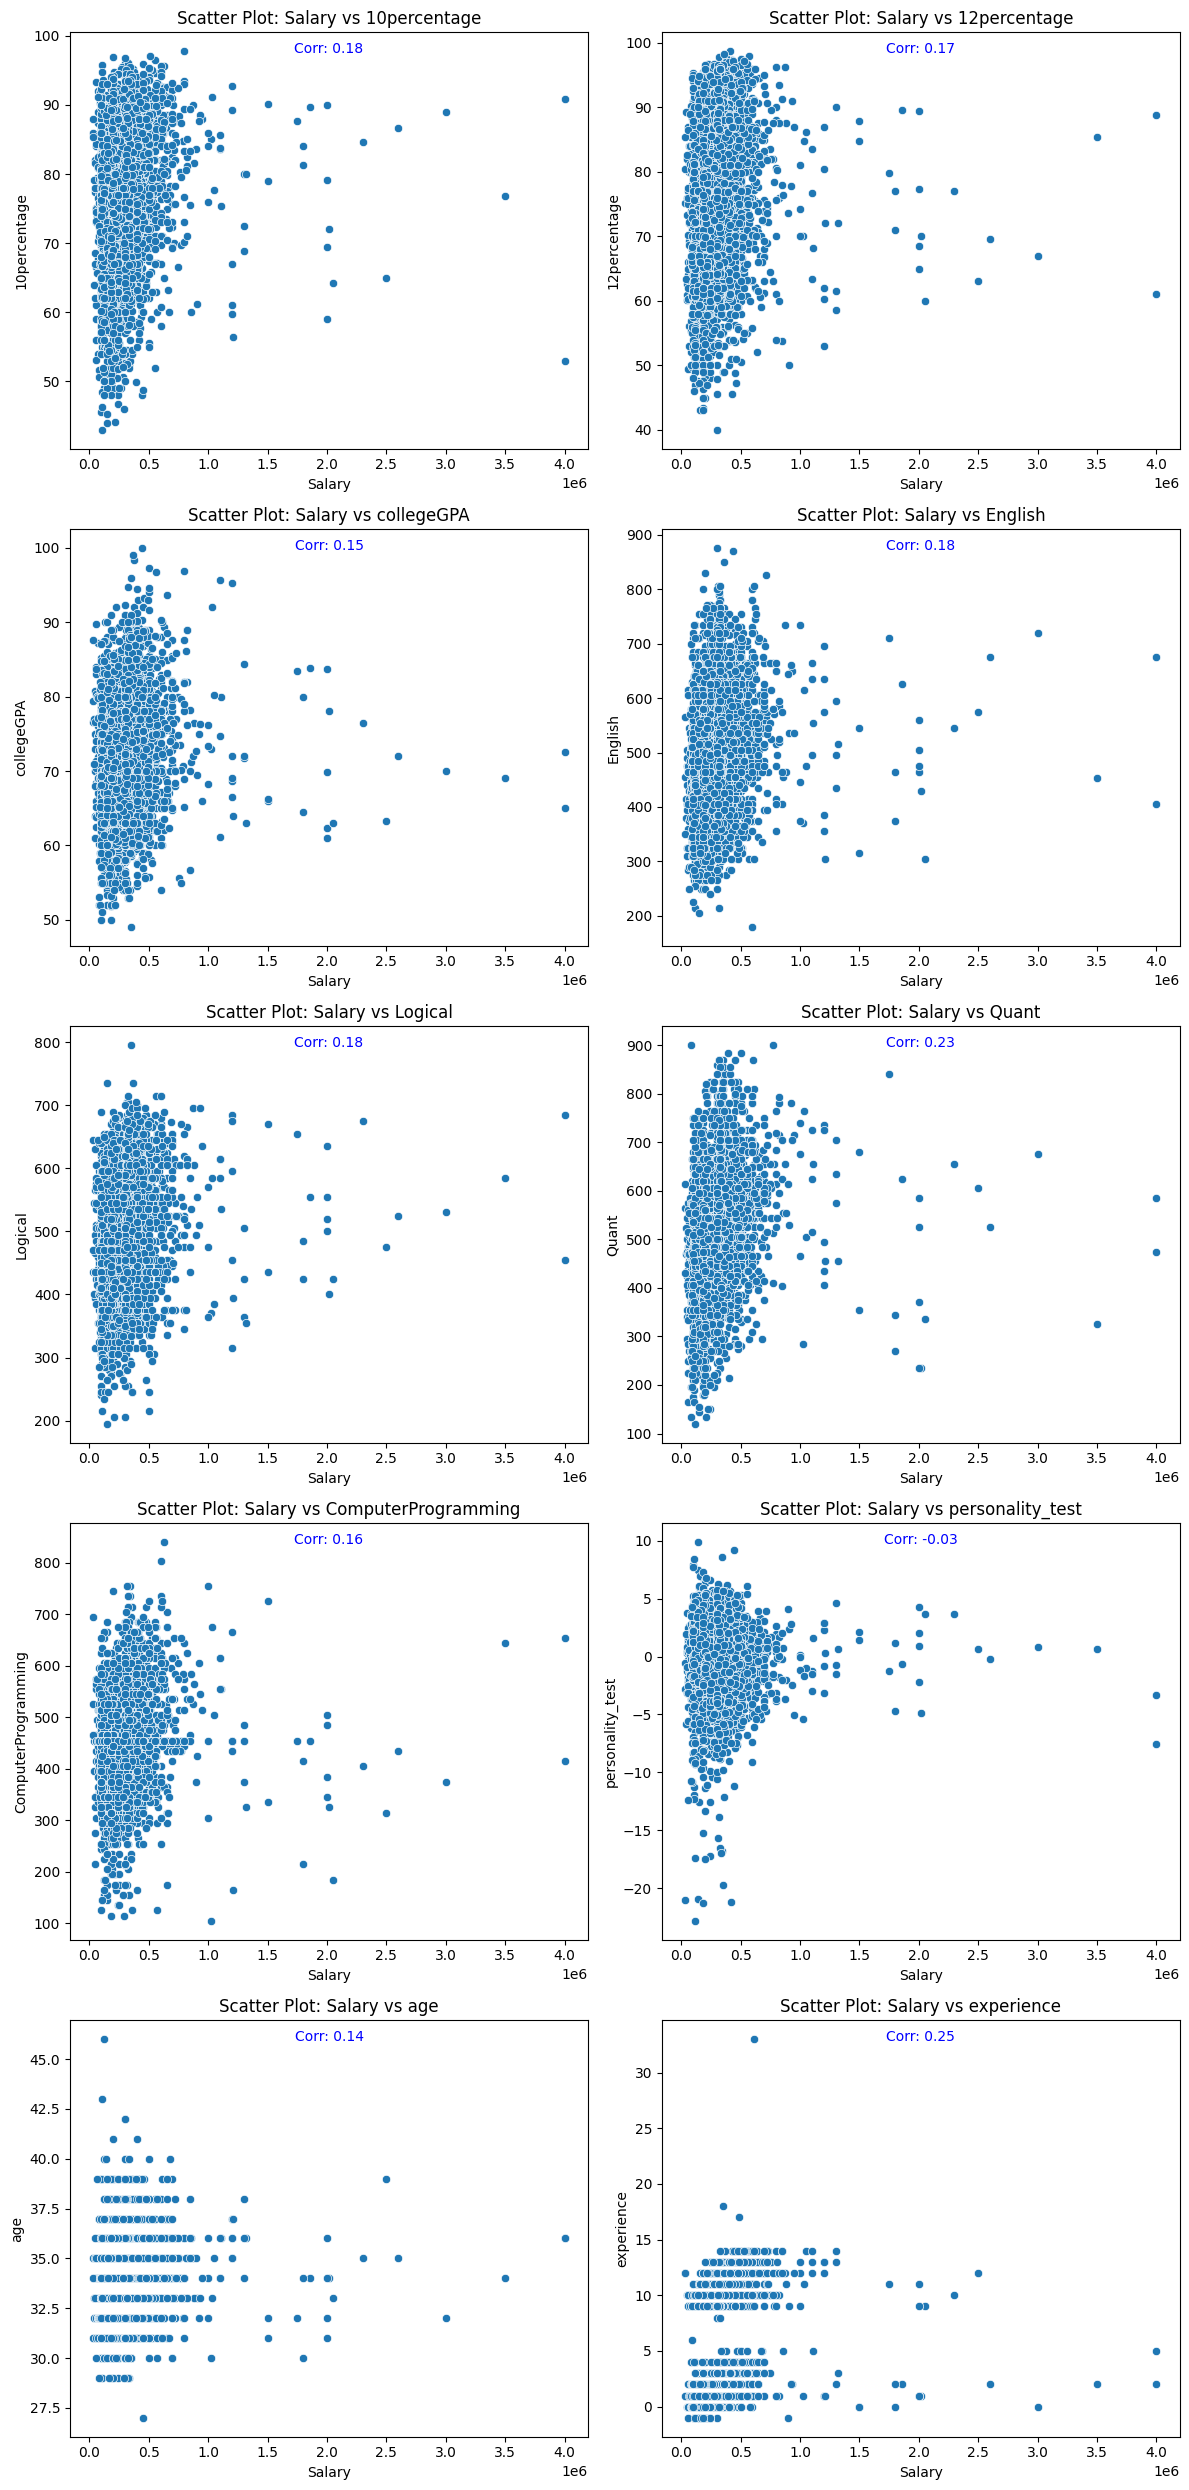

In [166]:
scatterplot_salary(data, scatter_columns)

### Scatterplots after removing outliers

In [167]:
def remove_outliers(data, column):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    threshold = 3
    data_no_outliers = data[z_scores <= threshold].copy()
    return data_no_outliers

In [168]:
data_no_outliers = remove_outliers(data, columns)

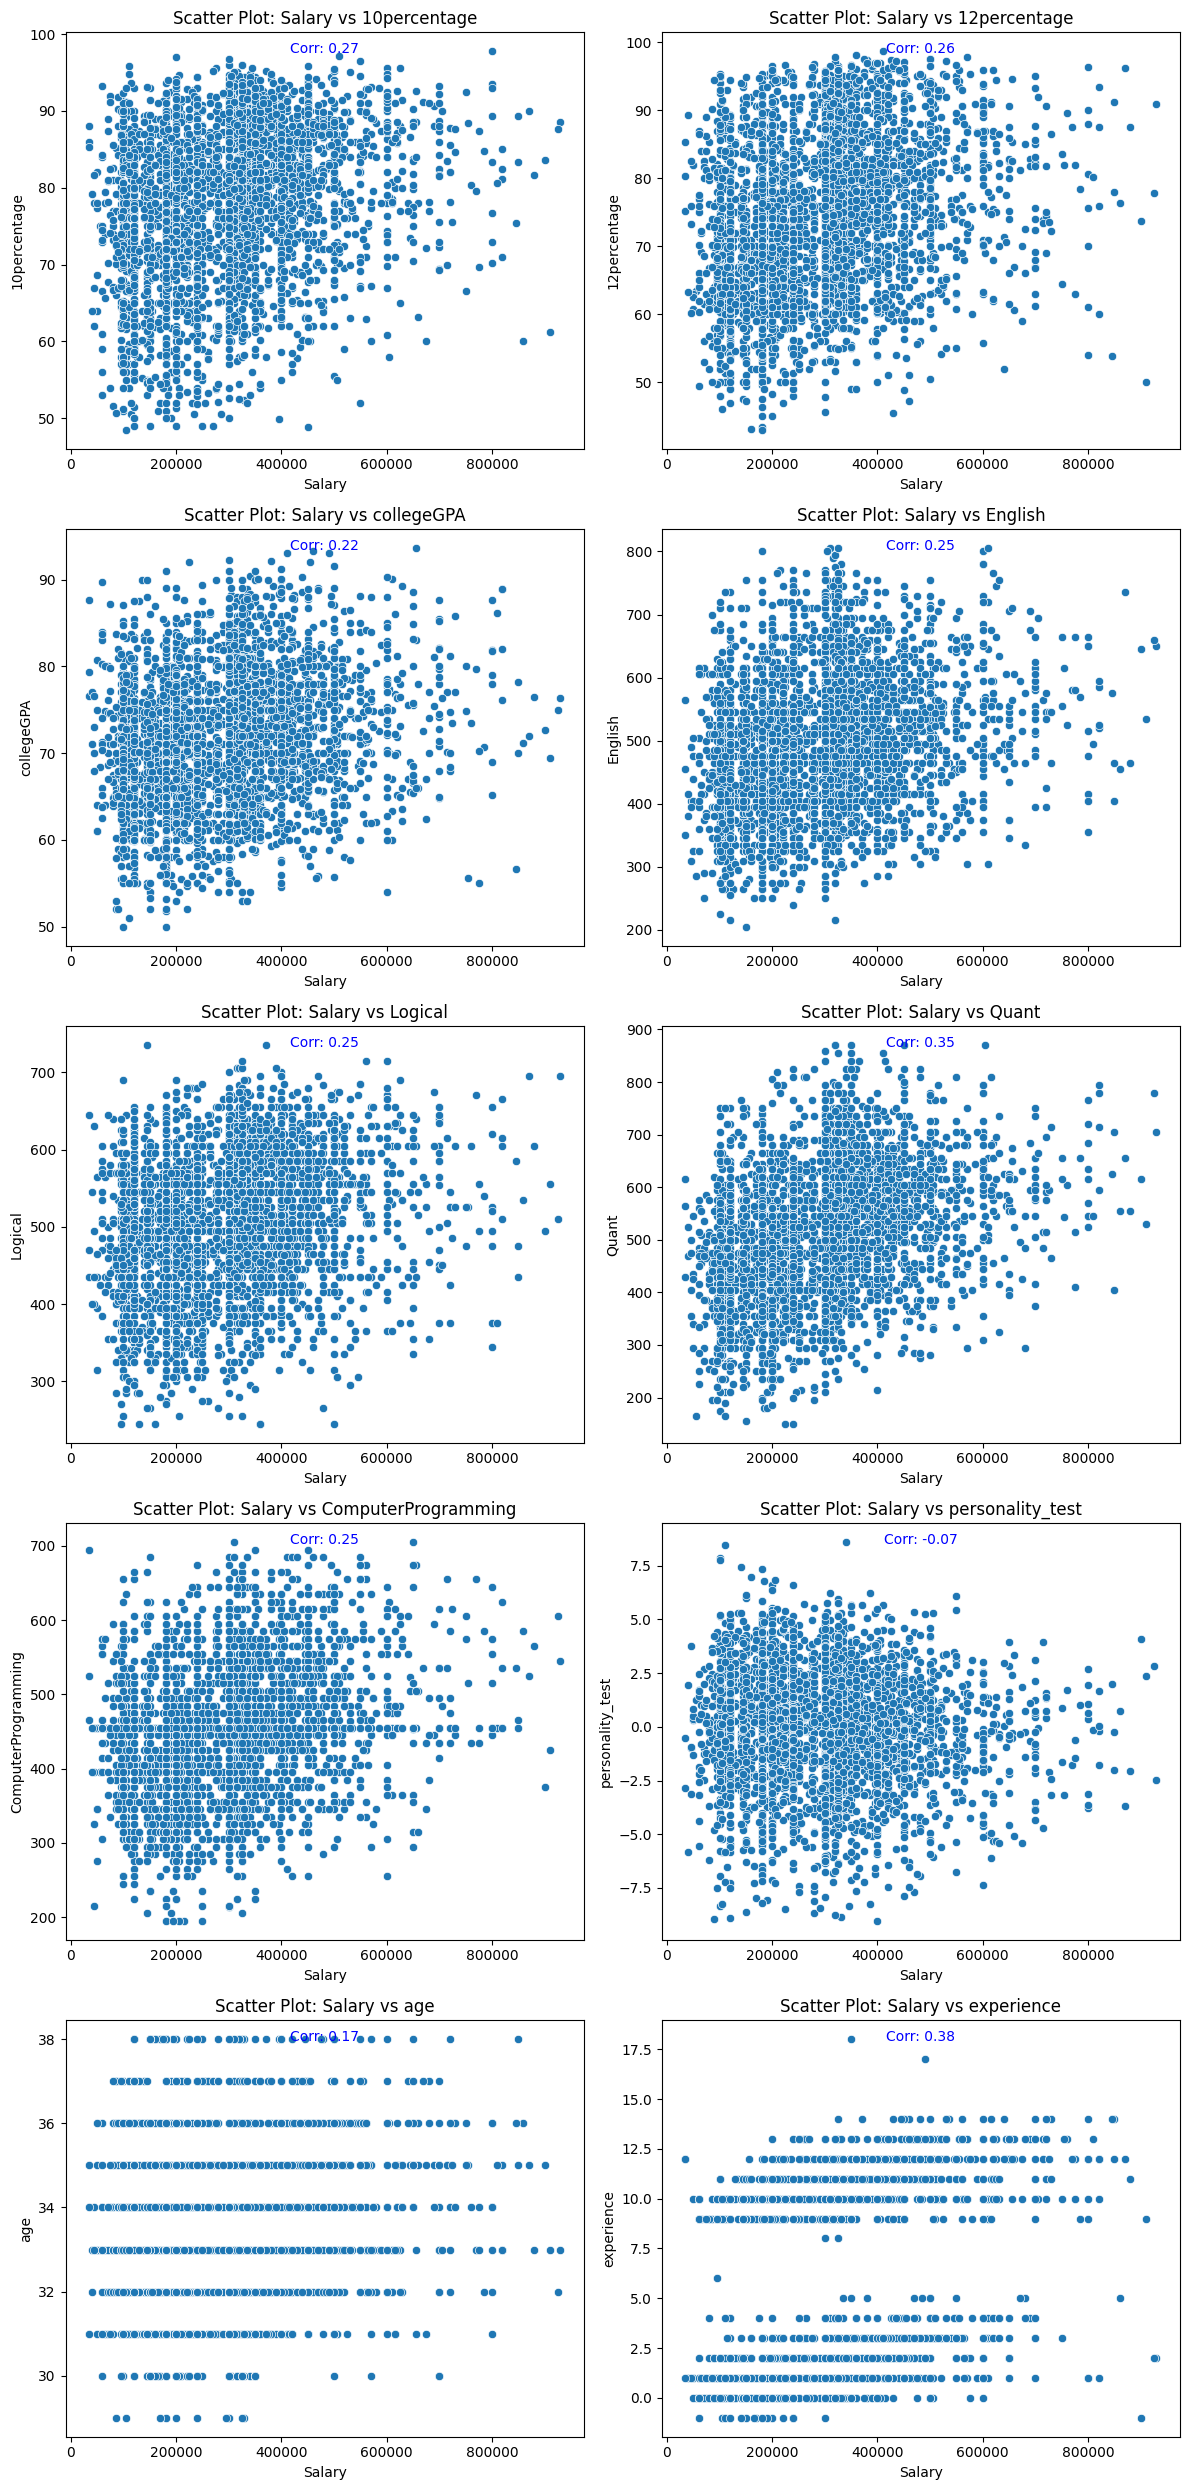

In [169]:
scatterplot_salary(data_no_outliers, scatter_columns)

Experience has the highest correlation with Salary, with r = 0.40, indicating that salary depends on experience.

## 4. Research Question

### 1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 

In [187]:
data['Designation'] = data['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

data['Designation'] = data['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [189]:
df = data[(data["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (data["Specialization"].isin(["computer science & engineering", "computer engineering"]))]

In [191]:
from scipy import stats

avg_salary_by_designation = df.groupby('Designation')['Salary'].mean()

print("Average Salary by Designation:")
print(avg_salary_by_designation)
print()

range_lower = 250000  
range_upper = 300000  

t_stat, p_value = stats.ttest_1samp(avg_salary_by_designation, (range_lower + range_upper) / 2)

alpha = 0.05

print("One-Sample t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
print()

print("Hypothesis Testing:")
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is enough evidence to suggest that the average salaries are within the given range.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that the average salaries are within the given range.")

Average Salary by Designation:
Designation
programmer analyst    347589.285714
software engineer     354239.130435
Name: Salary, dtype: float64

One-Sample t-test Results:
t-statistic: 22.83187390542922
p-value: 0.02786513129231036

Hypothesis Testing:
Reject the null hypothesis.
There is enough evidence to suggest that the average salaries are within the given range.


### 2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [179]:
data['Specialization'] = data['Specialization'].replace(['electronics & telecommunications', 'electronics and communication engineering', 'electronics and electrical engineering'], 'electronics and communication engineer')
data['Specialization'] = data['Specialization'].replace(['computer science & engineering', 'computer application', 'computer engineering'], 'computer engineering') 

Contingency Table:
Specialization  computer engineering  electrical engineering  \
Gender                                                         
f                                417                      17   
m                               1171                      65   

Specialization  electronics and communication engineer  \
Gender                                                   
f                                                  274   
m                                                  923   

Specialization  information technology  mechanical engineering  other  
Gender                                                                 
f                                  173                      10     66  
m                                  487                     191    204  



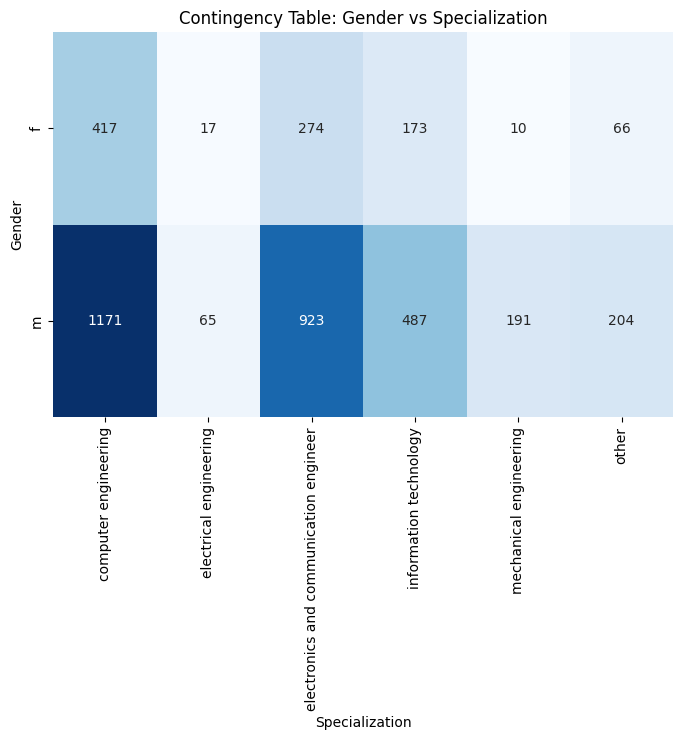

Chi-square Statistic: 47.494660404870665
p-value: 4.503854477756338e-09
Degrees of Freedom: 5

Expected Frequencies:
Specialization  computer engineering  electrical engineering  \
Gender                                                         
f                          380.11906               19.628314   
m                         1207.88094               62.371686   

Specialization  electronics and communication engineer  \
Gender                                                   
f                                           286.525513   
m                                           910.474487   

Specialization  information technology  mechanical engineering       other  
Gender                                                                      
f                           157.983992               48.113307   64.629815  
m                           502.016008              152.886693  205.370185  

Hypothesis Testing:
The null hypothesis (H0) is rejected.
There is a significant rel

In [181]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

print("Contingency Table:")
print(contingency_table)
print()

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Contingency Table: Gender vs Specialization")
plt.xlabel("Specialization")
plt.ylabel("Gender")
plt.show()

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
print()

alpha = 0.05
print("Hypothesis Testing:")
if p < alpha:
    print("The null hypothesis (H0) is rejected.")
    print("There is a significant relationship between Gender and Specialization.")
else:
    print("The null hypothesis (H0) is not rejected.")
    print("There is no significant relationship between Gender and Specialization.")

In [183]:
for specialization in contingency_table.columns:
    male_count = contingency_table.loc['m', specialization]
    female_count = contingency_table.loc['f', specialization]
    
    if female_count == 0:
        ratio = "Infinity (No females)"
    else:
        ratio = male_count / female_count
    
    print(f"Ratio of Male to Female in {specialization}: {ratio}")

Ratio of Male to Female in computer engineering: 2.8081534772182253
Ratio of Male to Female in electrical engineering: 3.823529411764706
Ratio of Male to Female in electronics and communication engineer: 3.3686131386861313
Ratio of Male to Female in information technology: 2.815028901734104
Ratio of Male to Female in mechanical engineering: 19.1
Ratio of Male to Female in other: 3.090909090909091


The number of males in each branch is almost three times the number of females, with an exception in the Mechanical Engineering branch. In Mechanical, this ratio goes up to an alarming 19 times.

## 5. Conclusion

In conclusion, this analysis provides valuable insights into the dataset, shedding light on student performance, salary expectations, and potential areas for improvement. While the average salaries for specified job roles align with expectations, further exploration into various factors can enhance decision-making processes for students, educational institutions, and employers alike.

- The dataset paints a picture of a diverse and capable student population, with strong academic foundations and varied skill sets.
- Average salaries for specified job roles are in line with industry standards, providing a benchmark for entry-level salary expectations.
- Understanding the nuances of academic performance, personality traits, and work experiences can aid both students and employers in making informed decisions.